Notebook purpose

- Explore huq data

In [12]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import s3fs

# add custom packages to sys.path and import
sys.path.append('/Users/fgu/dev/projects/habits')
import habits.helpers.aws as aws
import habits.data.make_dataset as dd

# pandas options
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)
pd.set_option('max_colwidth', None)
pd.set_option('precision', 3)

# figure settings
sns.set_context('talk')

# ipython magic
%load_ext google.cloud.bigquery
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

# project dirs
# RAWDIR = 's3://fgu-data-mdb/clean'
FIGDIR = '/Users/fgu/dev/projects/habits/reports/figures'
RAWDIR = 's3://3di-data-huq/clean'
CLEANDIR = 's3://3di-project-habits'
DATADIRS = [RAWDIR, CLEANDIR]

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
fn = 'sample_devices_10_tagged.csv'
fp = os.path.join(RAWDIR, fn)

df = (dd.read_huq(fp)
      .pipe(dd.clean))

print(df.shape)
df.head(2)

(89442, 36)


,app_id_hash,brand_categories,brand_name,brand_uuid,city,country,device_carrier_code,device_carrier_name,device_id,device_language,device_locale,device_manufacturer,device_model,device_sim_code,gender,geo_tag,human_readable_os,impression_acc,impression_dwell_lower_bounds,impression_dwell_upper_bounds,impression_heading,impression_id,impression_lat,impression_lng,impression_speed,impression_transient_join_confidence,municipality_coarse,municipality_granular,place_categories,place_lat,place_lng,place_name,postcode,timestamp,transposed_carrier,date
0,h96hec86znf6wgc5q51g1a==,bank,barclays bank,e18d5a8b-61ec-4ef0-a9bd-2e9c4883acf6,london,gb,23410.0,lycamobile,vbellu7ukjmwjhtyrsyxrg==,en,gb,motorola,moto g6 play,23426.0,NaN,NaN,android,18.400,0.0,0.050,148.261,f88b1c00-1981-4354-8aa5-f4e8caf14f8b,51.489,-0.096,152.098,0.995,england,london,bank;finance,51.488,-0.096,barclays,se171,2020-07-08 12:43:38+00:00,lycamobile,2020-07-08
1,ekktlkjvbncpbda/slwi2g==,train operator,great western railway,819c51bb-6c08-4181-900a-4b9fa64abfa5,NaN,gb,NaN,NaN,apgalyh7h2g5wisg//ddmq==,en,gb,lenovo,tab 2 a7-30f,NaN,NaN,NaN,android,2566.202,0.0,2.067,NaN,3dd4a93c-e224-4682-a946-e8d485b59718,51.478,-0.991,NaN,0.793,england,devon,train operator,50.527,-3.599,great western railway,tq124,2019-11-01 07:50:04+00:00,NaN,2019-11-01


# General

<AxesSubplot:>

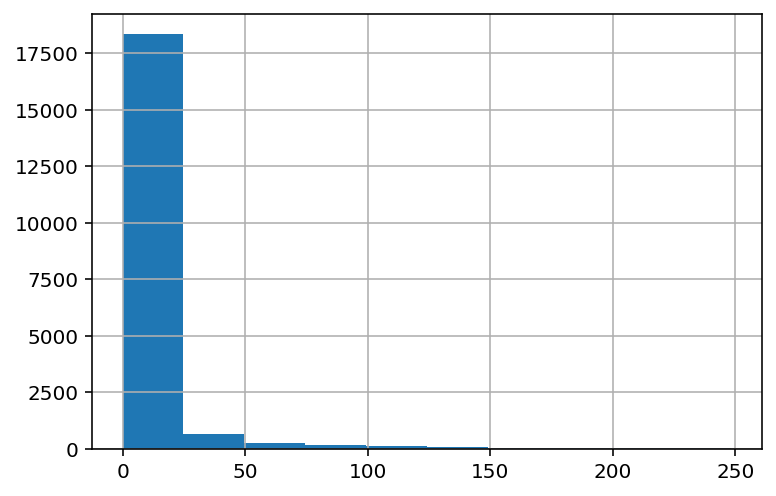

In [38]:
df.impression_speed.hist()

<AxesSubplot:>

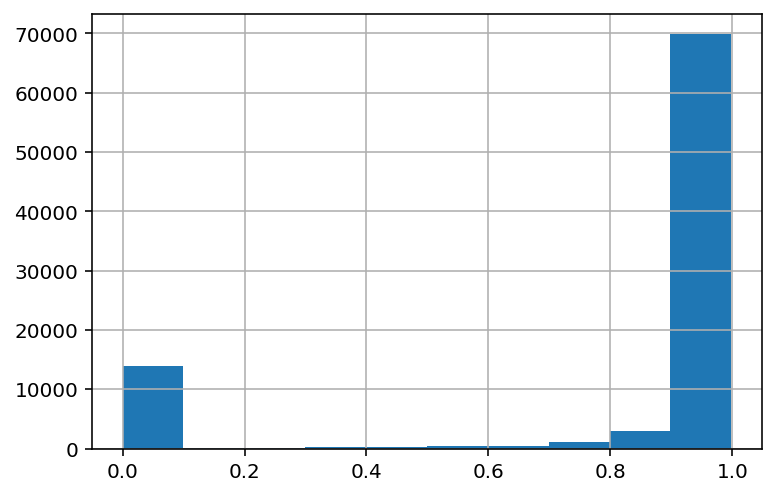

In [26]:
df.impression_transient_join_confidence.hist()

# User behaviour 

Let's check the number of observations and observation window for each device

In [4]:
sumstats = (df.groupby('device_id')['timestamp']
            .describe(datetime_is_numeric=True)
            .sort_values('count', ascending=False)
            .loc[:, ['count', 'min', 'max']]
            .reset_index())
sumstats

,device_id,count,min,max
0,apgalyh7h2g5wisg//ddmq==,61335,2019-10-16 18:07:10+00:00,2021-01-14 01:26:00+00:00
1,mqagtudihlzm3yz2fwqfra==,15251,2019-09-27 09:12:59+00:00,2021-05-20 20:29:14+00:00
2,vbellu7ukjmwjhtyrsyxrg==,5466,2020-05-11 14:11:56+00:00,2021-03-04 17:48:45+00:00
3,tf7mvgkdsidjxdsr6anm8q==,3868,2019-08-22 07:44:04+00:00,2021-04-05 00:34:52+00:00
4,xjrcsmdrf7wxmxmvv5d75q==,2175,2020-11-06 09:31:13+00:00,2021-03-29 02:45:54+00:00
5,oujrb9dsfofcbreaf+esmw==,650,2019-09-25 08:29:08+00:00,2020-08-29 21:54:25+00:00
6,uvpkbxdvtrcs13/w2ip5og==,397,2019-12-02 12:54:59+00:00,2021-05-12 17:39:40+00:00
7,iovmvuvrrorlzizw9hai8g==,278,2019-06-02 06:32:14+00:00,2021-05-14 15:37:42+00:00
8,sq3dcxjrbebb3fzcbwykva==,22,2020-07-09 18:38:35+00:00,2021-05-01 11:10:27+00:00


Most frequent tags

In [5]:
df.place_categories.value_counts()[:50]

domestic                                   72408
company office                              7343
train operator                              2250
gym;health                                  1450
bank;finance                                1336
petrol station                               763
supermarket;food                             499
food;restaurant                              447
food;bar                                     412
point of interest                            282
shop;clothing shop                           279
shop                                         253
electronics shop;shop                        252
hotel                                        240
bank                                         230
betting shop                                 182
food;supermarket;shop                        142
cafe;food                                    100
restaurant;food                               93
hospital;health                               80
train station       

## Gym data

Investigate gym visits from all users

In [6]:
gyms = df[df.place_categories.str.contains('gym')]
gyms.brand_name.value_counts()

david lloyd leisure    1445
Name: brand_name, dtype: int64

In [7]:
gyms.device_id.value_counts()

mqagtudihlzm3yz2fwqfra==    1450
Name: device_id, dtype: int64

## Gym user

Keep all data for all devices with gym visits

In [8]:
gym_users = gyms.device_id.unique()
dfu = df[df.device_id.isin(gym_users)]
dfu.value_counts(subset=['place_categories', 'municipality_granular'])

place_categories             municipality_granular
domestic                     hampshire                6642
company office               portsmouth               5157
                             west sussex              1794
gym;health                   portsmouth               1431
hotel                        surrey                     82
health;hospital              portsmouth                 50
hospital;health              hampshire                  37
gym;health                   surrey                     19
hotel                        hampshire                  17
hospital;health              portsmouth                  9
point of interest            hampshire                   5
company office;finance;bank  west sussex                 3
                             hampshire                   2
shop                         west sussex                 2
shopping centre;shop         hampshire                   1
dtype: int64

Look at gym visits over time

<AxesSubplot:xlabel='Date', ylabel='Number of observations'>

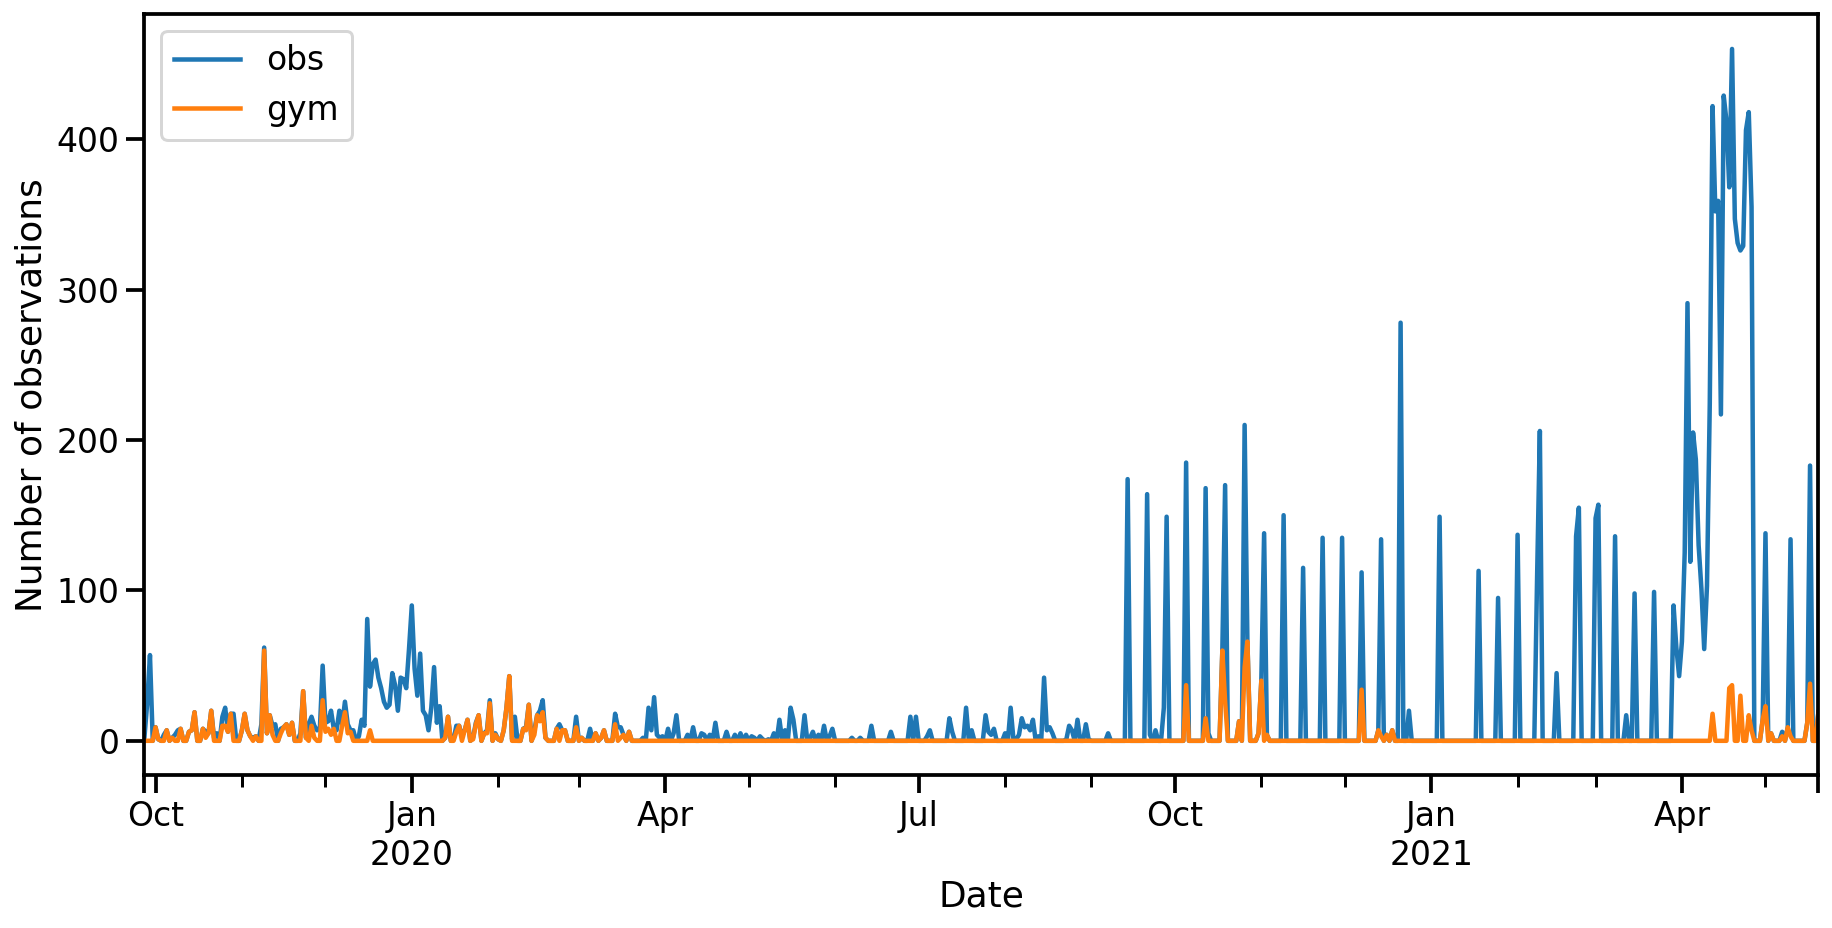

In [23]:
fig, ax = plt.subplots()

(dfu.assign(gym=dfu.place_categories.str.contains('gym'),
            obs=dfu.place_categories.notna())
 .set_index('date')
 .sort_index()
 .loc[:, ['obs', 'gym']]
 .resample('d')
 .sum()
).plot(figsize=(15,7), ax=ax, ylabel='Number of observations', xlabel='Date')

In [24]:
# export figure

fn = 'gym_visits.png'
fp = os.path.join(FIGDIR, fn)
fig.savefig(fp)